# 85_Titanic data using PCA, kNN

In [92]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [93]:
import re

title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])
                            #\, : , 로 시작하고,
                             #\s : 공백
                                #\w+ : 글자들이 나오고
                                    #(\s\w+)? : 공백과 글자가 나올수도 있고 (True 이면 추가) // 'The Countess' 의 예
                                         # \. : . 으로 마무리되는 문장을
                                                # dataset['name'] : dataset['name'] 컬럼에서
                    # research : 찾는다.
                                                                # .group : 해당 문장을 하나로 묶고
                                                                        # [2:-1] : index 2 ~ index -1 까지 슬라이싱한다.
        # append() : 리스트에 추가한다.

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [94]:
# 귀족, 평민 구분

titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona','Dr','Lady','the Countess']
Rare_m = ['Capt','Col','Don','Major','Rev','Sir','Jonkheer','Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()
                # unique() : 고유값 반환

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [95]:
# gender  컬럼 생성
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
            # LabelEncoder : Encode target labels with value between 0 and n_classes-1
le_sex.fit(titanic['sex'])
titanic['gender'] = le_sex.transform(titanic['sex'])

print(le_sex.classes_)
print(titanic['gender'].unique())

['female' 'male']
[0 1]


In [96]:
# grade 컬럼 생성
le_grade = LabelEncoder()
le_grade.fit(titanic['title'])
titanic['grade'] = le_grade.transform(titanic['title'])

print(le_grade.classes_)
print(titanic['grade'].unique())        # 0 : Miss , 1 : Mr, 2 : Mrs, 3 : Rare_f, 4 : Rare_m

['Miss' 'Mr' 'Mrs' 'Rare_f' 'Rare_m']
[0 4 1 2 3]


In [97]:
# null 이 아닌 데이터만
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
                                # notnull() : null이 아닌 데이터를 조회
titanic.info()
        # info() : DataFrame의 info를 확인하는 함수.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  title      1045 non-null   object 
 15  gender     1045 non-null   int64  
 16  grade      1045 non-null   int64  
dtypes: float64(3), int64(6), object(8)
memory usage: 147.0+ KB


In [98]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass','age','sibsp','parch','fare','gender','grade']].astype('float')
                                                                    # astype('float') : float 형식으로 받아오기.
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
                                                    # feature Data
                                                        # Target
                                                            # test_size : train 데이터 대비 20% 를 테스트 데이터로 배치
                                                                            # random_state : 무작위 설정을 13으로 고정

In [99]:
# pca 적용 준비
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_'+str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns=cols)

In [100]:
import numpy as np

def print_variance_ratio(pca, only_sum=False):
    if only_sum == False:
        print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))

In [101]:
# 두개의 축으로 변환
pca_data, pca = get_pca_data(X_train, n_components=2)
                            # ss_data : StandardScaled 된 데이터 를 말하는게 아닌가?
print_variance_ratio(pca)

variance_ratio :  [0.93577394 0.06326916]
sum of variance_ratio:  0.9990431009511274


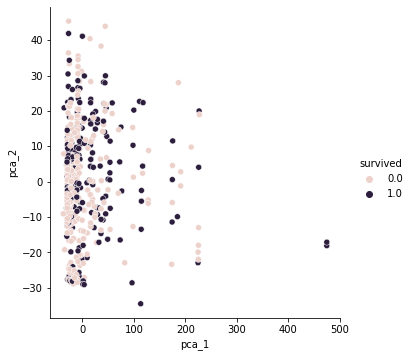

In [102]:
# 그리기
import seaborn as sns

pca_columns = ['pca_1','pca_2']
pca_pd = pd.DataFrame(pca_data, columns=pca_columns)
pca_pd['survived'] = y_train

sns.pairplot(pca_pd, hue='survived', height=5, x_vars=['pca_1'], y_vars=['pca_2']);

# 구분이 쉽지 않다.

In [103]:
## n_components를 3으로
pca_data, pca = get_pca_data(X_train, n_components=3)
print_variance_ratio(pca)

variance_ratio :  [9.35773938e-01 6.32691630e-02 4.00903990e-04]
sum of variance_ratio:  0.9994440049413547


In [104]:
pca_pd = get_pd_from_pca(pca_data, 3)

pca_pd['survived'] = y_train.values
pca_pd.head()

,pca_0,pca_1,pca_2,survived
0,-28.763184,4.479379,-0.451531,0
1,41.587362,22.084594,0.011834,0
2,-19.598979,-10.999936,0.558167,0
3,-28.232483,-6.559632,-1.349217,1
4,-29.055717,-1.510811,-0.538886,0


In [105]:
import plotly.express as px

fig = px.scatter_3d(pca_pd, 
                    x = 'pca_0',y='pca_1',z = 'pca_2',
                    color = 'survived', symbol='survived',
                    opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [108]:
# pipe line 구축

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('clf', KNeighborsClassifier(n_neighbors=20))]

pipe = Pipeline(estimators)
        # Pipeline : The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
                # steps : List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.
                
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
print(accuracy_score(y_test, pred))

# X has feature names, but StandardScaler was fitted without feature names


0.7703349282296651


In [109]:
# ['pclass','age','sibsp','parch','fare','gender','grade']
# grade : array(['Miss','Mr','Mrs','Rare_f','Rare_m'], dtype=object)

dicaprio = np.array([[3, 18, 0, 0, 5, 1, 1]])
print('Decaprio : ', pipe.predict_proba(dicaprio)[0, 1])

winslet = np.array([[1, 16, 1, 1, 100, 0, 3]])
print('Winslet : ', pipe.predict_proba(winslet)[0, 1])

# X does not have valid feature names, but StandardScaler was fitted with feature names 
# https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0
## X_train가 feature를 포함한 DataFrame이기 때문에 발생하는 오류
## X_train.values 를 하면 온전한 values만 갖게 되기 때문에 해당 오류를 해결할 수 있다.

Decaprio :  0.1
Winslet :  0.85


/Users/newrandom/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/Users/newrandom/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
## 결론 : Pipeline을 이용하여 계산한 Decaprio와 Winslet의 생존확률은 각각 10% , 85% 이다.